In [2]:
!pip install dmba

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline


# 다중 선형 회귀

## 회귀분석
* 독립변수가 종속변수에 미치는 영향력을 측정하여 독립변수의 일정한 값에 대응되는 종속변수의 값을 예측하기 위한 방법
* 단순회귀분석: 한 개의 독립변수와 한 개의 종속변수 사이의 관계를 분석
* 다중 회귀분석: 한 개의 종속변수와 여러 개의 독립변수 사이의 관계를 분석

---

* 독립변수를 이용하여 종속변수를 잘 맞출 수 있는 회귀식(=모델, 수식)을 만드는 과정(=모델링)을 의미함
* 모델링에서 각 독립변수 별 기울기 계수가 결정되며, 모델 성능의 핵심임

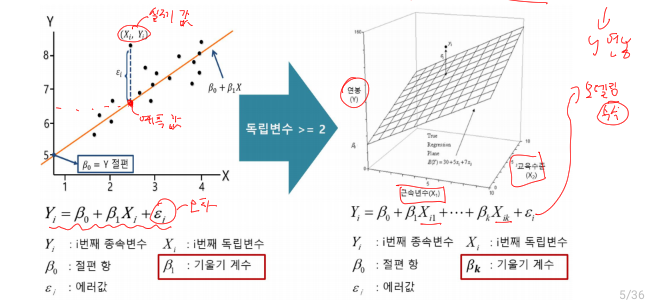

## 회귀를 사용한 모델과 예측 모델의 모델링
### 선형 회귀분석의 두 가지 주된 목적
* 요인 간의 관계를 설명(전통적인 통계적 접근방법)
    * 모집단에 내재된 인과관계를 이해하기 위해서 데이터를 가장 좋은 모형에 적합시키는 것
    * 제한된 데이터로부터 결론을 유도하고 그 결론이 얼마나 신뢰할 만한가에 중점을 두고 있음
* 새로운 사례에 대해 출력값을 예측(데이터마이닝 접근방법)
    * 새로운 관찰치를 에측하는 것에 초점
    * 데이터가 일반적으로 풍부하기 때문에 모형에 대한 성과와 신뢰성은 새로운 데이터를 모형에 적용함으로써 쉽게 입증된다고 봄
### 회귀모델 적합 목적
* 출력에 대한 입력의 평균 효과에 대한 설명 또는 정량화(각각, 설명적 혹은 기술적 작업)
    * "다른 모든 요소($X_2, X_3, ..., X_p$)의 변화량을 고려하지 않을 때, 서비스 속도($X_1$)의 단위 증가 시 고객 만족도($Y$)가 평균 5포인트 상승하는 관계를 보여준다."와 같은 문장을 생성함
        * 인과관계로 밝혀지면 서비스 속도의 개선 같은 방침을 이끌 수 있다는 점을 의미하므로 설명 모델링이라고도 함
    * 인과관계가 확실치 않으면 이 모델은 입력과 출력 간의 연관성을 정량화하는데, 이러한 방법을 기술 모델링이라고 함
* 주어진 입력 값을 활용하여 새 레코드의 결과 값 예측(예측 작업)
    * 회귀 계수나 '평균 레코드'를 다루지 않고 생성되는 모델을 활용한 새로운 레코드에 대한 예측에 중점을 둠
        * 생성되는 모델은 레코드 수준의 미시적 의사결정에 사용됨

### 설명 모델
* 데이터를 잘 적합시키는 모델
* 모집단에 가정된 관계에 대한 정보가 최대한 반영된 최적의 적합 모델을 추정하기 위해서 전체 데이터셋 사용
* 성능 측정은 데이터가 모델에 얼마나 잘 적합하는지(즉, 모델이 데이터의 실제 값과 얼마나 비슷한 값을 주는지)와 평균 관계가 얼마나 강한지를 측정
* 회귀 계수($\beta$)에 초점

### 예측 모델
* 새로운 사례를 정확하게 예측하는 모델
* 예측 모델에서는 데이터를 일반적으로 학습 데이터셋과 검증 데이터셋으로 나눔
* 성능 측정은 예측의 정확도(즉, 모델이 새로운 사례를 얼마나 잘 예측하는지)를 측정
* 예측에 초점을 둠($\hat{y}$)

## 단순선형회귀모형
### 단순선형회귀모형의 기본가정
* 단순선형회귀모형에서도 종속변수 $Y_i$가 다음 식에 따라 독립변수 $X$와 관계가 있는 것으로 가정한다.

$$Y_i = \beta _0 + \beta _1 x _1 + ... + \epsilon _i$$

$$i=1, 2, ..., n$$

* 여기서 확률 오차항 $\epsilon_i$는 다음의 성질을 갖는 것으로 가정한다.
    1. $\epsilon_i \sim N(0, \sigma^2_{\epsilon})$
    2. 오차항은 서로 독립이다.

---

1. 등분산성가정
    * $\epsilon_i \sim N(0, \sigma^2_{\epsilon})$
    * $X$의 각 값에 대한 $Y$값의 분포에 대한 분산이 $X$값에 관계없이 일정하다는 의미

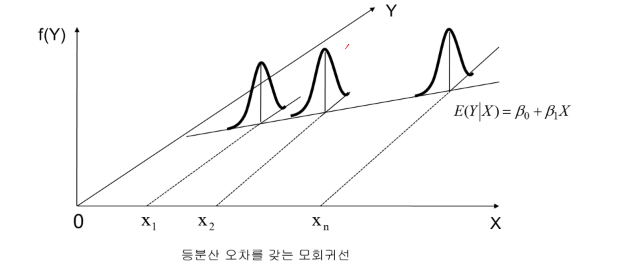

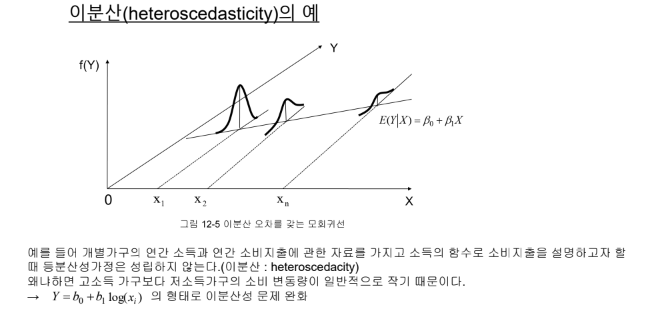

2. 오차항의 독립성 가정
    * 한 기간의 오차($\epsilon_i$)의 다른 기간의 오차($\epsilon_i$)에 영향을 미치지 않는다는 가정

---

### 모델 진단
* 구축된 회귀모델의 진단은 모집단 회귀모델에 포함된 오차항에 대해 다음과 같은 가정을 바탕으로 수행
* 가정
    * X와 Y 사이에 선형적인 관계가 존재
    * 오차항($\epsilon_i$)은 정규분포를 따름
    * 오차항의 평균은 0, E($\epsilon_i$)=0
    * 오차항의 등분산성, $Var(\epsilon_i)=\sigma^2$
    * 오차항은 서로 독립, $Cov(\epsilon_i, \epsilon_j)=0, i!=j$
    
    -> 잔차 정보를 이용하여 판단: $e_i=Y-i - \hat{Y_i}$

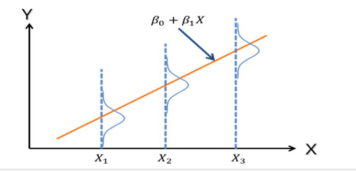

---

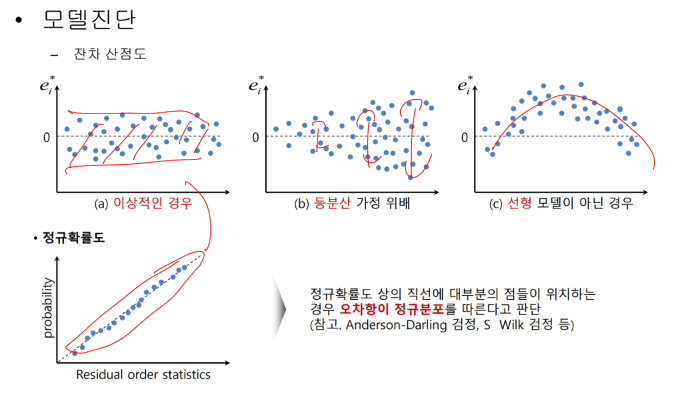

---

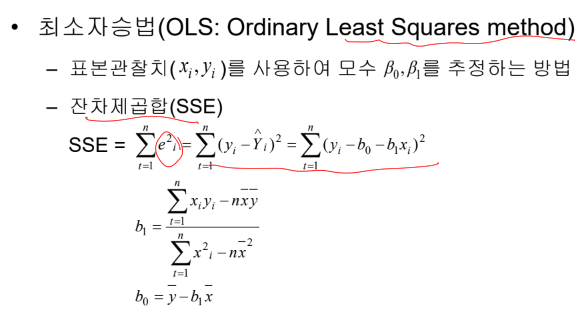

---

### 선형회귀방정식의 설명력
* 결정 계수: $R^2 = \frac{SSR}{SST} = \frac{설명변동}{총변동}$
* $R^2$는 Y의 변동중 회귀선에 의해 설명되는 상대적 양에 대한 측도로 $R^2$이 값이 클수록 종속변수 Y의 행태에 대한 회귀방정식의 설명력이 커진다.
* ($R^2=0$: 독립변수 X가 종속변수 Y의 행태를 전혀 설명 못함)

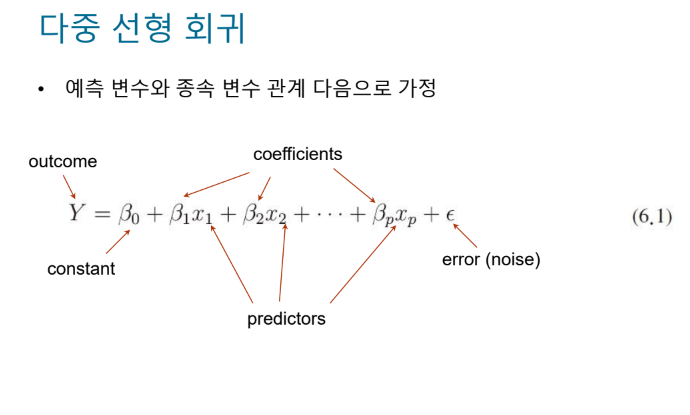

## 회귀식의 추정과 예측
* 일반적으로 보통 최소제곱법(최소자승법, OLS: Ordinary Least Squares)을 사용해 데이터로부터 회귀식의 계수를 추정
    * 실제값(y)과 모델에서의 예측을 기반으로 한 값($hat{y}$) 사이의 편차제곱합을 최소화하는 추정치 $\hat{\beta_0}, \hat{\beta_1}, ... , \hat{\beta_p}$를 찾음
* 입력값이 $x_2, x_3, ..., x_p$인 레코드의 출력 변수 값 예측한 식
$$\hat{Y}=\hat{\beta_0}+ \hat{\beta_1}x_1+ ... +\hat{\beta_p}x_p$$

* 이 식이 예측이 가장 좋은 예측이라 할 수 있는 이유: 다음과 같은 가정을 만족하면 예측이 불편 값(Unbiased)(예측 값의 평균값이 실제 값과 동일하고)이고, 다른 불편 추정값과 비교했을 때 평균 제곱 오차가 가장 작기 때문
    * 노이즈 $\epsilon$(또는 Y)는 표준 정규분포를 따른다
    * 선택된 예측 변수가 적절하고 선형성을 따른다.
    * 각 관측치들이 서로 독립적이다.
    * 각 예측 변수에 대한 Y값의 변동성은 예측 변수 값에 상관없이 동일하다(등분산성: homo-skedasticity)

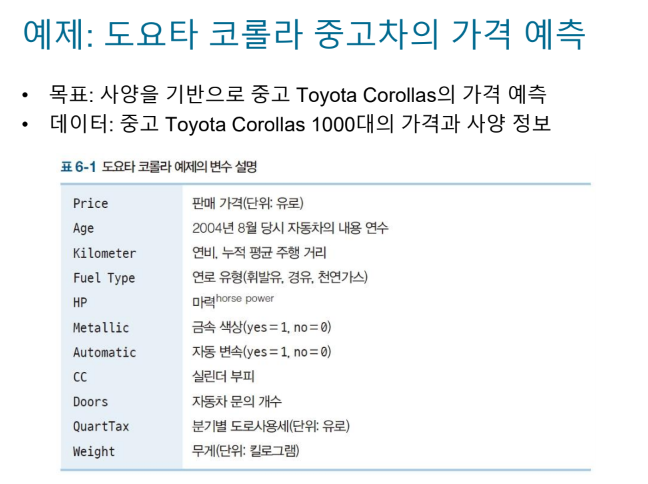

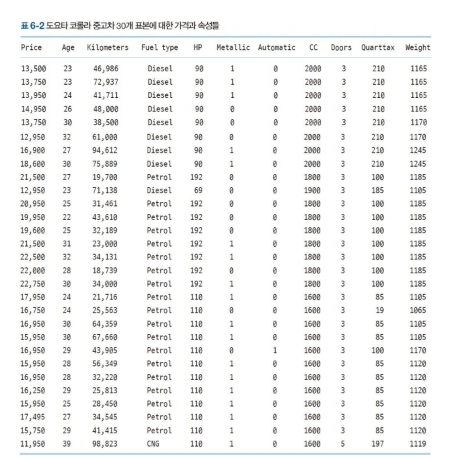

In [3]:
# Reduce data frame to the top 1000 rows and select columns for regression analysis
car_df = dmba.load_data('ToyotaCorolla.csv')
car_df = car_df.iloc[0:1000]

predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC',
              'Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price'

# partition data
X = pd.get_dummies(car_df[predictors], drop_first=True)
y = car_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X))

intercept  -1319.3543800411699
           Predictor  coefficient
0          Age_08_04  -140.748761
1                 KM    -0.017840
2                 HP    36.103419
3          Met_Color    84.281830
4          Automatic   416.781954
5                 CC     0.017737
6              Doors   -50.657863
7      Quarterly_Tax    13.625325
8             Weight    13.038711
9   Fuel_Type_Diesel  1066.464681
10  Fuel_Type_Petrol  2310.249543

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


$y=-1319.35-140.75x_{age}-0.018x_{KM}+36.10x_{HP}+...+1066.46x_{Fuel_D}+2310.25x_{Fuel_P}$

In [4]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, car_lm_pred)

        Predicted  Actual     Residual
507  10607.333940   11500   892.666060
818   9272.705792    8950  -322.705792
452  10617.947808   11450   832.052192
368  13600.396275   11450 -2150.396275
242  12396.694660   11950  -446.694660
929   9496.498212    9995   498.501788
262  12480.063217   13500  1019.936783
810   8834.146068    7950  -884.146068
318  12183.361282    9900 -2283.361282
49   19206.965683   21950  2743.034317
446  10987.498309   11950   962.501691
142  18501.527375   19950  1448.472625
968   9914.690947    9950    35.309053
345  13827.299932   14950  1122.700068
971   7966.732543   10495  2528.267457
133  17185.242041   15950 -1235.242041
104  19952.658062   19450  -502.658062
6    16570.609280   16900   329.390720
600  13739.409113   11250 -2489.409113
496  11267.513740   11750   482.486260

Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
        

0.7425


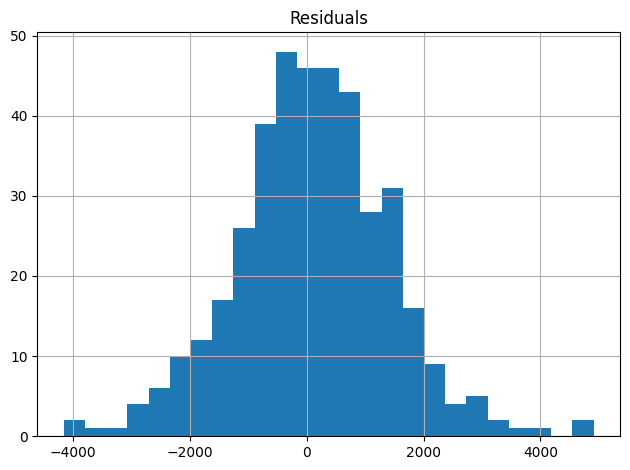

In [5]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

## 선형회귀 분석의 변수 선택
### 모델에 변수 활용 시 주의 사항
* 예측 변수들을 전부 수집하는 것이 실행 가능하지 않거나 비용이 너무 비쌀 수 있다.
* 적은 수의 예측 변수를 사용하면 더 정확한 측정을 수행할 수 있다.
* 적은 수의 예측 변수를 사용하면 더 정확한 측정을 수행할 수 있다(설문조사).
* 예측 변수가 많을수록 데이터에 결측치가 존재할 위험성이 높아진다. 만약 결측치가 있는 경우 해당 데이터를 삭제하거나 대체한다고 하면, 다수 개의 예측 변수를 갖는 경우에는 높은 삭제율 혹은 대체율이 나타날 것이다.
* 적은 수의 모수를 가지는 모델에서 예측 변수의 영향력에대해 더 잘 통찰할 수 있다(간결성: parsimony)
* 변수가 많은 모델에서는 다중 공선성으로 인해 회귀 계수의 추정치들이 불안정할 수 있다. 회귀 계수는 간결한 모델에서 더욱 안정적이다. 상당히 대략적이긴 하지만 대개 레코드의 수 n은 5(p+2)개보다 많이 사용해야 한다(p개의 예측 변수)
* 종속 변수와 상관관계가 없는 예측변수를 사용하면 예측의 분산이 증가할 수 있다.
* 종속 변수와 실제 상관관계가 있는 예측 변수를 누락시키면 예측의 평균 오차 혹은 바이어스가 증가할 수 있다.

### 예측변수의 수를 어떻게 줄일 것인가?
* 그 분야의 지식 활용
    * 다양한 예측 변수가 무엇을 측정하고 있는지, 이 변수들이 종속 변수의 반응 예측에 적절한 이유는 무엇인지 이해하는 것이 중요함
    * 이러한 지식을 바탕으로 분별력 있는 예측변수들이 되도록 그 개수를 줄여 나가는 거싱 중요
* 계산력(전역 탐색 방법)과 통계적 유의성 이용
    * 전역탐색방법
        * 예측변수의 가능한 모든 조합으로부터 회귀모델을 적합시켜 최적의 예측 변수 집합을 찾는 방법
        * 가능한 모델 수가 많기 때문에 다소 실용적이지 않아 많이 사용되지 않음
    * 모델 중 일부 집합을 통해 찾는 방법

### 전역 탐색 방법(Exhaustive Search): 최상의 서브셋
* 예측 변수의 가능한 모든 조합으로부터 회귀 모델을 적합시켜 최적의 예측 변수 집합 찾음
* 모든 예측변수의 서브셋(부분집합)을 평가
* 가장 가능성이 높은 서브셋이 어떤 것인지 검토하여 예측 변수를 선택하는 방법 사용
* 너무 단순한 모델(과소적합 모델)을 선택해 중요한 변수들을 누락한다거나 반대로 너무 복잡한 모델(과적합 모델)을 선택하여 노이즈까지 학습하지 않독록 주의
* 모델을 평가 및 비교 기준은 학습 데이터셋에 대한 적합
* 수정 결정 계수: $R^{adj}=1-\frac{n-1}{n-p-1}(1-R^2)$
* AIC(Akaike Information Criterion): $AIC=n \ln(SSE/n)+n(1+\ln(2\pi))+2(p+1)$
* BIC(Schwartz's Bayesian Information Criterion): 
$BIC=n\ln(SSE/n)+n(1+\ln(2\pi))+\ln(n)(p+1)$

In [6]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)

    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj           AIC  Age_08_04  Automatic     CC  Doors  Fuel_Type_Diesel  \
0    1  0.767901  10689.712094       True      False  False  False             False   
1    2  0.801160  10597.910645       True      False  False  False             False   
2    3  0.829659  10506.084235       True      False  False  False             False   
3    4  0.846357  10445.174820       True      False  False  False             False   
4    5  0.849044  10435.578836       True      False  False  False             False   
5    6  0.853172  10419.932278       True      False  False  False             False   
6    7  0.853860  10418.104025       True      False  False  False              True   
7    8  0.854297  10417.290103       True       True  False  False              True   
8    9  0.854172  10418.789079       True       True  False   True              True   
9   10  0.854036  10420.330800       True       True  False   True              True   
10  11  0.853796  10422.298278  

### 대표적인 서브셋 선택 알고리즘
* 모든 가능한 회귀 모델로 이루어진 공간에 대해 부분적이며 반복적인 탐색을 통해 이루어짐
* 전방 선택 방법, 후방 소거법, 단계적 선택 방법 있음
    * 전방 선택법(forward selection)
    * 후방 소거법(backward elimination)
    * 단계적 선택법(stepwise selection)
* 예측변수 수가 많을 때 사용하기 적합한 방법이고, 예측 변수 수가 보통 수준이라면 전역 탐색을 하는 것이 더 나음

#### 전방 선택 방법
* 예측 변수가 없는 상태에서 예측 변수를 하나씩 추가해 나가는 방법
* 추가되는 예측 변수의 기여도가 통계적으로 유의하지 않을 때 중단
* 둘 이상의 예측 변수가 함께 사용될 때는 효과적이지만 각각 단일변수로 사용될 때는 낮은 성능을 보이는 예측 변수들을 누락시킬 수 있음

In [17]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, add None


#### 후방 소거법
* 처음에는 모든 에측 변수를 사용하는 데에서 시작해 단계별로 가장 유용하지 않은 예측 변수들을(통계적 유의성에 의해) 제거해 나가는 방법
* 제거되지 않고 남아 있는 예측 변수들의 기여도가 모두 유의하다고 판단될 때 중단
* 모든 예측 변수를 포함하는 초기 모델을 계산하는 데 시간이 많이 소요되고 불안정

In [16]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=10422.30
Step: score=10420.33, remove CC
Step: score=10418.79, remove Met_Color
Step: score=10417.29, remove Doors
Step: score=10417.29, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


In [14]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


#### 단계적 선택방법
* 각 단계별로 통계적으로 유의하지 않은 변수들을 탈락시키는 것을 제외하면 전방 선택 방법과 동일

In [18]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, unchanged None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']


## 정규화(수축 모델)
* 철저한 검색=최상의 하위 집합
* 평가된 예측 변수의 모든 가능한 서브셋
* 가장 일반적인 수축법으로 릿지 회귀와 라쏘
    * 릿지 회귀에서 패널티는 계수의 제곱합인 $\sum_{j=1}^{p}\beta^2_j (L2패널티)$를 사용
    * 라쏘는 예측 변수p(절편은 제외)에 대한 절댓값의 합인 $\sum_{j=1}^{p}|\beta_j|(L1패널티)$ 사용. 라쏘 패널티는 효과적으로 일부 계수를 0으로 축소하여 예측 변수의 서브셋을 생성
* 선형 회귀 계수는 오차제곱합 SSE의 학습 데이터셋 합을 최소화하여 추정
* 릿지 회귀 및 라쏘에서는 학습 데이터셋의 SSE를 최소화하여 계수를 추정하며, 패널티 항이 일부 임곗삽 t 미만일 수 있음

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso = Pipeline([
    ['normalize', StandardScaler()],
    ['model', Lasso(alpha=1)],
])
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))

lasso_cv = Pipeline([
    ['normalize', StandardScaler()],
    ['model', LassoCV(cv=5)],
])
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv['model'].alpha_)
print(lasso_cv['model'].coef_)

ridge = Pipeline([
    ['normalize', StandardScaler()],
    ['model', Ridge(alpha=1)],
])
ridge.fit(train_X, train_y)
regressionSummary(valid_y, ridge.predict(valid_X))

bayesianRidge = Pipeline([
    ['normalize', StandardScaler()],
    ['model', BayesianRidge()],
])
bayesianRidge.fit(train_X, train_y)
regressionSummary(valid_y, bayesianRidge.predict(valid_X))
print('Bayesian ridge chosen regularization: ',
      bayesianRidge['model'].lambda_ / bayesianRidge['model'].alpha_)


Regression statistics

                      Mean Error (ME) : 104.4168
       Root Mean Squared Error (RMSE) : 1313.2944
            Mean Absolute Error (MAE) : 1017.6609
          Mean Percentage Error (MPE) : -0.2619
Mean Absolute Percentage Error (MAPE) : 9.0100

Regression statistics

                      Mean Error (ME) : 132.4317
       Root Mean Squared Error (RMSE) : 1360.7243
            Mean Absolute Error (MAE) : 1034.4871
          Mean Percentage Error (MPE) : -0.2610
Mean Absolute Percentage Error (MAPE) : 9.1337
Lasso-CV chosen regularization:  52.81252993972756
[-2344.72733104  -638.64821716   509.86847033     0.
    44.37403325     0.            -0.           299.72739261
   757.83746697    -0.           188.03203033]

Regression statistics

                      Mean Error (ME) : 104.3792
       Root Mean Squared Error (RMSE) : 1312.8865
            Mean Absolute Error (MAE) : 1017.4566
          Mean Percentage Error (MPE) : -0.2657
Mean Absolute Percentage Error 

In [20]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'Price ~ ' + ' + '.join(predictors)

car_lm = sm.ols(formula=formula, data=train_df).fit()
print(car_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     319.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):          1.73e-239
Time:                        19:14:17   Log-Likelihood:                -5198.1
No. Observations:                 600   AIC:                         1.042e+04
Df Residuals:                     588   BIC:                         1.047e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               